#ANÁLISIS DE NETFLIX 

## Importar datos 

In [1]:
import io 
import pandas as pd 

In [2]:
data = pd.read_csv('NetflixDimas.csv')
data.head()

,Title,Date
0,Marvel's Daredevil: Season 3: A New Napkin,12/30/21
1,Marvel's Daredevil: Season 3: One Last Shot,12/29/21
2,Marvel's Daredevil: Season 3: Reunion,12/29/21
3,Marvel's Daredevil: Season 3: Karen,12/29/21
4,Marvel's Daredevil: Season 3: Revelations,12/29/21


## Análisis exploratorio 

In [3]:
data.shape

(305, 2)

In [4]:
data.info() #Date está como object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   305 non-null    object
 1   Date    305 non-null    object
dtypes: object(2)
memory usage: 4.9+ KB


In [5]:
data.tail(20)

,Title,Date
285,Titans: Season 1: Hank and\tDawn,2/15/20
286,Titans: Season 1: Donna Troy,2/15/20
287,Titans: Season 1: The Asylum,2/15/20
288,Titans: Season 1: Jason Todd,2/15/20
289,Titans: Season 1: Together,2/15/20
290,Night on Earth: Limited Series: Jungle Nights,2/8/20
291,Night on Earth: Limited Series: Frozen Nights,2/8/20
292,Night on Earth: Limited Series: Moonlit Plains,2/8/20
293,The Boss Baby: Back in Business: Season 1: Sco...,2/8/20
294,The Secret Life of Pets,1/22/20


Parece que existe un patrón en el que diferentes partes se separan mediante dos puntos. Vamos a contar en cuantas partes distintas se separan nuestros contenidos

In [6]:
separacion_lista = data.Title.str.split(pat=':',expand= False).to_frame()
separacion_lista 

,Title
0,"[Marvel's Daredevil, Season 3, A New Napkin]"
1,"[Marvel's Daredevil, Season 3, One Last Shot]"
2,"[Marvel's Daredevil, Season 3, Reunion]"
3,"[Marvel's Daredevil, Season 3, Karen]"
4,"[Marvel's Daredevil, Season 3, Revelations]"
...,...
300,[The Croods]
301,[The Christmas Chronicles]
302,[Klaus]
303,[Sing]


In [7]:
separacion_lista['num_partes'] = separacion_lista.Title.apply(len)
separacion_lista.tail(30)

,Title,num_partes
275,"[Franco Escamilla, Bienvenido al mundo]",2
276,[Our Planet - Behind The Scenes],1
277,[Print the Legend],1
278,"[Our Planet, Season 1, Jungles]",3
279,"[Our Planet, Season 1, Frozen Worlds]",3
280,"[Our Planet, Season 1, One Planet]",3
281,"[SpongeBob SquarePants, Season 5, Friend or ...",3
282,"[Titans, Season 2, Trigon]",3
283,"[Titans, Season 1, Dick\tGrayson]",3
284,"[Titans, Season 1, Koriand'r]",3


In [8]:
separacion_lista.num_partes.value_counts()

3    197
1     46
4     44
5      9
2      9
Name: num_partes, dtype: int64

In [9]:
separacion_lista.loc[separacion_lista.num_partes ==1].head(15) #Estás al parecer son películas 

,Title,num_partes
39,[Generation Iron 3],1
40,[Spider-Man 2],1
41,[Spider-Man],1
42,[Love & Other Drugs],1
43,[No Strings Attached],1
45,"[Extremely Wicked, Shockingly Evil and Vile]",1
57,[Army of the Dead],1
58,[The Woman in the Window],1
59,[I See You],1
60,[White Chicks],1


In [10]:
separacion_lista.loc[separacion_lista.num_partes ==2].head(15) #Estos son documentales y películas

,Title,num_partes
79,"[Cowspiracy, The Sustainability Secret]",2
115,"[Alex Fernández, The Best Comedian in the World]",2
116,"[Spider-Man, Homecoming]",2
147,"[Batman v Superman, Dawn of Justice]",2
191,"[Minimalism, A Documentary About the Importan...",2
237,"[Money Heist, The Phenomenon]",2
241,"[Kong, Skull Island]",2
271,"[Night on Earth, Shot in the Dark]",2
275,"[Franco Escamilla, Bienvenido al mundo]",2


In [11]:
separacion_lista.loc[separacion_lista.num_partes ==3].head(15) #A partir de tres ya son series 

,Title,num_partes
0,"[Marvel's Daredevil, Season 3, A New Napkin]",3
1,"[Marvel's Daredevil, Season 3, One Last Shot]",3
2,"[Marvel's Daredevil, Season 3, Reunion]",3
3,"[Marvel's Daredevil, Season 3, Karen]",3
4,"[Marvel's Daredevil, Season 3, Revelations]",3
5,"[Marvel's Daredevil, Season 3, Upstairs/Down...",3
6,"[Marvel's Daredevil, Season 3, Aftermath]",3
7,"[Marvel's Daredevil, Season 3, The Devil You...",3
8,"[Marvel's Daredevil, Season 3, The Perfect G...",3
9,"[Marvel's Daredevil, Season 3, Blindsided]",3


In [12]:
separacion_lista.loc[separacion_lista.num_partes ==4].head(15)

,Title,num_partes
67,"[Rick and Morty, Season 4, Claw and Hoarder,...",4
70,"[Rick and Morty, Season 4, Edge of Tomorty, ...",4
78,"[Rick and Morty, Season 3, Vindicators 3, ...",4
85,"[Rick and Morty, Season 2, Interdimensional ...",4
91,"[Formula 1, Drive to Survive, Season 3, Dow...",4
92,"[Formula 1, Drive to Survive, Season 3, Man...",4
93,"[Formula 1, Drive to Survive, Season 3, No ...",4
94,"[Formula 1, Drive to Survive, Season 3, Gue...",4
95,"[Formula 1, Drive to Survive, Season 3, The...",4
96,"[Formula 1, Drive to Survive, Season 3, The...",4


In [13]:
separacion_lista.loc[separacion_lista.num_partes ==5].head(5)

,Title,num_partes
257,"[Abstract, The Art of Design, Season 2, Cas...",5
258,"[Abstract, The Art of Design, Season 2, Ner...",5
263,"[Abstract, The Art of Design, Season 2, Jon...",5
264,"[Abstract, The Art of Design, Season 2, Ian...",5
265,"[Abstract, The Art of Design, Season 2, Rut...",5


## Creación de variables 

### Varaibles derivadas del título

In [14]:
import numpy as np


In [15]:
separacion_lista['tipo'] = np.where(separacion_lista.num_partes < 3, 'película', 'serie')
separacion_lista

,Title,num_partes,tipo
0,"[Marvel's Daredevil, Season 3, A New Napkin]",3,serie
1,"[Marvel's Daredevil, Season 3, One Last Shot]",3,serie
2,"[Marvel's Daredevil, Season 3, Reunion]",3,serie
3,"[Marvel's Daredevil, Season 3, Karen]",3,serie
4,"[Marvel's Daredevil, Season 3, Revelations]",3,serie
...,...,...,...
300,[The Croods],1,película
301,[The Christmas Chronicles],1,película
302,[Klaus],1,película
303,[Sing],1,película


In [16]:
df = pd.concat([data, separacion_lista['tipo']], axis=1)
df

,Title,Date,tipo
0,Marvel's Daredevil: Season 3: A New Napkin,12/30/21,serie
1,Marvel's Daredevil: Season 3: One Last Shot,12/29/21,serie
2,Marvel's Daredevil: Season 3: Reunion,12/29/21,serie
3,Marvel's Daredevil: Season 3: Karen,12/29/21,serie
4,Marvel's Daredevil: Season 3: Revelations,12/29/21,serie
...,...,...,...
300,The Croods,12/8/19,película
301,The Christmas Chronicles,12/8/19,película
302,Klaus,12/8/19,película
303,Sing,12/8/19,película


In [17]:
separacion_cols = df.Title.str.split(pat=':', expand=True)
separacion_cols

,0,1,2,3,4
0,Marvel's Daredevil,Season 3,A New Napkin,None,None
1,Marvel's Daredevil,Season 3,One Last Shot,None,None
2,Marvel's Daredevil,Season 3,Reunion,None,None
3,Marvel's Daredevil,Season 3,Karen,None,None
4,Marvel's Daredevil,Season 3,Revelations,None,None
...,...,...,...,...,...
300,The Croods,None,None,None,None
301,The Christmas Chronicles,None,None,None,None
302,Klaus,None,None,None,None
303,Sing,None,None,None,None


In [18]:
separacion_cols.columns = ['nivel1', 'nivel2', 'nivel3', 'nivel4', 'nivel5']
separacion_cols

,nivel1,nivel2,nivel3,nivel4,nivel5
0,Marvel's Daredevil,Season 3,A New Napkin,None,None
1,Marvel's Daredevil,Season 3,One Last Shot,None,None
2,Marvel's Daredevil,Season 3,Reunion,None,None
3,Marvel's Daredevil,Season 3,Karen,None,None
4,Marvel's Daredevil,Season 3,Revelations,None,None
...,...,...,...,...,...
300,The Croods,None,None,None,None
301,The Christmas Chronicles,None,None,None,None
302,Klaus,None,None,None,None
303,Sing,None,None,None,None


In [19]:
df = pd.concat([df, separacion_cols], axis=1)
df

,Title,Date,tipo,nivel1,nivel2,nivel3,nivel4,nivel5
0,Marvel's Daredevil: Season 3: A New Napkin,12/30/21,serie,Marvel's Daredevil,Season 3,A New Napkin,None,None
1,Marvel's Daredevil: Season 3: One Last Shot,12/29/21,serie,Marvel's Daredevil,Season 3,One Last Shot,None,None
2,Marvel's Daredevil: Season 3: Reunion,12/29/21,serie,Marvel's Daredevil,Season 3,Reunion,None,None
3,Marvel's Daredevil: Season 3: Karen,12/29/21,serie,Marvel's Daredevil,Season 3,Karen,None,None
4,Marvel's Daredevil: Season 3: Revelations,12/29/21,serie,Marvel's Daredevil,Season 3,Revelations,None,None
...,...,...,...,...,...,...,...,...
300,The Croods,12/8/19,película,The Croods,None,None,None,None
301,The Christmas Chronicles,12/8/19,película,The Christmas Chronicles,None,None,None,None
302,Klaus,12/8/19,película,Klaus,None,None,None,None
303,Sing,12/8/19,película,Sing,None,None,None,None


### Variables derivadas de la fecha 

In [20]:
df['fecha'] = pd.to_datetime(df.Date)
df.drop(columns= 'Date', inplace=True)
df

,Title,tipo,nivel1,nivel2,nivel3,nivel4,nivel5,fecha
0,Marvel's Daredevil: Season 3: A New Napkin,serie,Marvel's Daredevil,Season 3,A New Napkin,None,None,2021-12-30
1,Marvel's Daredevil: Season 3: One Last Shot,serie,Marvel's Daredevil,Season 3,One Last Shot,None,None,2021-12-29
2,Marvel's Daredevil: Season 3: Reunion,serie,Marvel's Daredevil,Season 3,Reunion,None,None,2021-12-29
3,Marvel's Daredevil: Season 3: Karen,serie,Marvel's Daredevil,Season 3,Karen,None,None,2021-12-29
4,Marvel's Daredevil: Season 3: Revelations,serie,Marvel's Daredevil,Season 3,Revelations,None,None,2021-12-29
...,...,...,...,...,...,...,...,...
300,The Croods,película,The Croods,None,None,None,None,2019-12-08
301,The Christmas Chronicles,película,The Christmas Chronicles,None,None,None,None,2019-12-08
302,Klaus,película,Klaus,None,None,None,None,2019-12-08
303,Sing,película,Sing,None,None,None,None,2019-12-08


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Title   305 non-null    object        
 1   tipo    305 non-null    object        
 2   nivel1  305 non-null    object        
 3   nivel2  259 non-null    object        
 4   nivel3  250 non-null    object        
 5   nivel4  53 non-null     object        
 6   nivel5  9 non-null      object        
 7   fecha   305 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(7)
memory usage: 19.2+ KB


In [22]:
df.set_index('fecha', inplace=True)
df

,Title,tipo,nivel1,nivel2,nivel3,nivel4,nivel5
fecha,,,,,,,
2021-12-30,Marvel's Daredevil: Season 3: A New Napkin,serie,Marvel's Daredevil,Season 3,A New Napkin,None,None
2021-12-29,Marvel's Daredevil: Season 3: One Last Shot,serie,Marvel's Daredevil,Season 3,One Last Shot,None,None
2021-12-29,Marvel's Daredevil: Season 3: Reunion,serie,Marvel's Daredevil,Season 3,Reunion,None,None
2021-12-29,Marvel's Daredevil: Season 3: Karen,serie,Marvel's Daredevil,Season 3,Karen,None,None
2021-12-29,Marvel's Daredevil: Season 3: Revelations,serie,Marvel's Daredevil,Season 3,Revelations,None,None
...,...,...,...,...,...,...,...
2019-12-08,The Croods,película,The Croods,None,None,None,None
2019-12-08,The Christmas Chronicles,película,The Christmas Chronicles,None,None,None,None
2019-12-08,Klaus,película,Klaus,None,None,None,None


In [23]:
def atributos_fecha(data):
  data['año'] = data.index.year
  data['mes'] = data.index.month_name()
  data['dia_mes'] = data.index.day
  data['dia_semana'] = data.index.day_name()
  return(data)

In [24]:
atributos_fecha(df)

,Title,tipo,nivel1,nivel2,nivel3,nivel4,nivel5,año,mes,dia_mes,dia_semana
fecha,,,,,,,,,,,
2021-12-30,Marvel's Daredevil: Season 3: A New Napkin,serie,Marvel's Daredevil,Season 3,A New Napkin,None,None,2021,December,30,Thursday
2021-12-29,Marvel's Daredevil: Season 3: One Last Shot,serie,Marvel's Daredevil,Season 3,One Last Shot,None,None,2021,December,29,Wednesday
2021-12-29,Marvel's Daredevil: Season 3: Reunion,serie,Marvel's Daredevil,Season 3,Reunion,None,None,2021,December,29,Wednesday
2021-12-29,Marvel's Daredevil: Season 3: Karen,serie,Marvel's Daredevil,Season 3,Karen,None,None,2021,December,29,Wednesday
2021-12-29,Marvel's Daredevil: Season 3: Revelations,serie,Marvel's Daredevil,Season 3,Revelations,None,None,2021,December,29,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-08,The Croods,película,The Croods,None,None,None,None,2019,December,8,Sunday
2019-12-08,The Christmas Chronicles,película,The Christmas Chronicles,None,None,None,None,2019,December,8,Sunday
2019-12-08,Klaus,película,Klaus,None,None,None,None,2019,December,8,Sunday


## Análisis 

In [25]:
#¿hace cuanto tiempo que tengo Netflix?
from datetime import date

hoy = pd.Timestamp(date.today() )
primer_dia = df.index.min()
tiempo= hoy - primer_dia
tiempo

print(f'Dimas, llevas utilizando Netlix {tiempo.days} días')

Dimas, llevas utilizando Netlix 769 días


In [26]:
#¿Cúanto me he gastado en Netflix?

coste_mensual = 139 
gasto = tiempo.days/ 30 * coste_mensual
gasto

print(f'Dimas, has gastado en  Netlix {gasto} MXN')

Dimas, has gastado en  Netlix 3563.0333333333333 MXN


In [34]:
#¿Cuánto tiempo de mi vida le he dedicado a Netflix cada año?

media_min_serie = 45
media_min_pelicula = 100

consumo = df.loc[df.año < 2022].groupby('tipo').Title.count()
min_pelis_año = consumo['película'] * media_min_pelicula/3
min_series_año = consumo['serie'] * media_min_serie/ 3
dias_pelis_año = min_pelis_año/ 60/ 24
dias_series_año = min_series_año/60 /24

dias_series_año


print(f'Dimas, al año dedicas  {round(dias_series_año)} dias de tu vida a ver series y {round(dias_pelis_año)} dias de tu vida a ver pelis')

Dimas, al año dedicas  3 dias de tu vida a ver series y 1 dias de tu vida a ver pelis


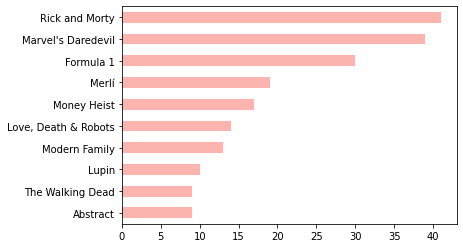

In [40]:
#¿Cuáles son las 10 series de las que he visto más capitulos?

df.loc[df.tipo == "serie"].nivel1.value_counts(ascending = True).tail(10).plot.barh(cmap= 'Pastel1')

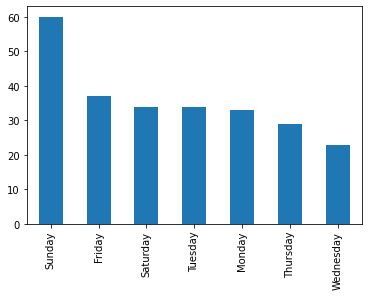

In [38]:
df.loc[df.tipo == 'serie', 'dia_semana'].value_counts().plot(kind= 'bar')

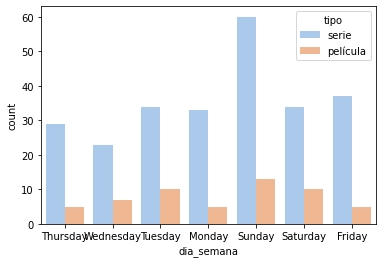

In [41]:
import seaborn as sns

sns.countplot(data = df, x = 'dia_semana', hue= 'tipo', palette= 'pastel')

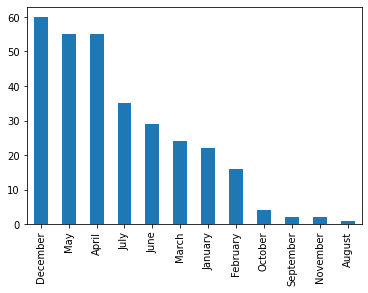

In [43]:
df.loc[df.año < 2022].mes.value_counts().plot.bar()

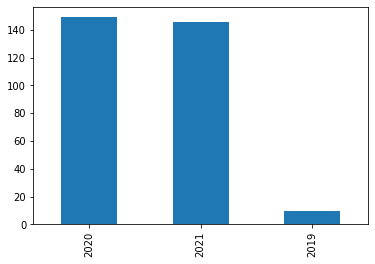

In [44]:
df.año.value_counts().plot.bar()